In [2]:
# IMPORTS
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')

# LOAD FUNCTIONS
%run useful_functions.ipynb

In [3]:
# can be removed 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## BLOCK 4: About the place where you live | ANALYSIS

In [ ]:
# Population Pyramid
# https://stackoverflow.com/questions/60969101/how-to-build-a-population-pyramid-with-python

df = df_t["Edat"].replace({"NC": 0}, inplace=True)
df = df_t['Edat'].astype(str).astype(int)

bar_plot = sns.barplot(x='s_llar', y='Edat', data=df, order=None, lw=0)
# bar_plot = sns.barplot(x='Female', y='Age', data=df, order=AgeClass, lw=0)

ValueError: Could not interpret input 's_llar'

<AxesSubplot:>

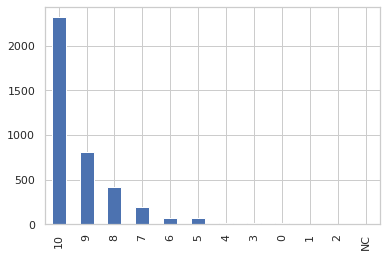

In [ ]:
# 16. To what extent are you satisfied or satisfied with the house where do you live
# s_llar

df_t['s_llar'].value_counts().plot(kind='bar')

[0.78609626 0.79792746 0.86649215 0.86901763 0.9023569  1.
 0.7372449  0.98066298 0.9009009  0.83622829] [0.13101604 0.11917098 0.13350785 0.08312343 0.06734007 0.08849558
 0.09183673 0.07458564 0.08708709 0.08684864]


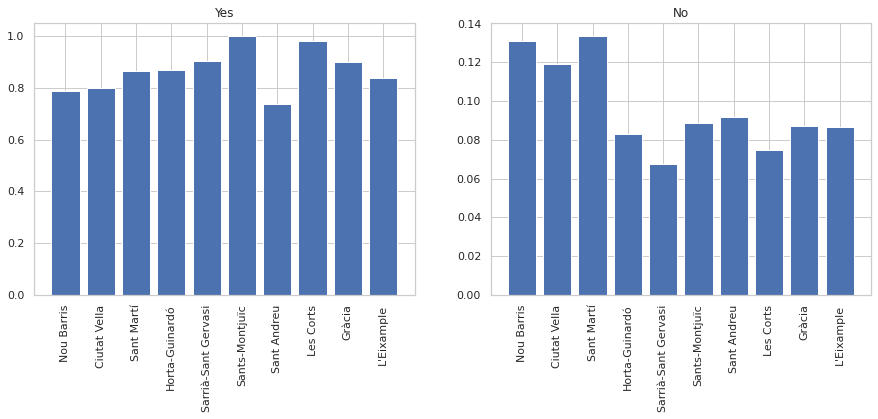

In [ ]:
# 17. Is there a place in your home where you can study in peace?
# ll_estudi
plot_yes_no('ll_estudi')

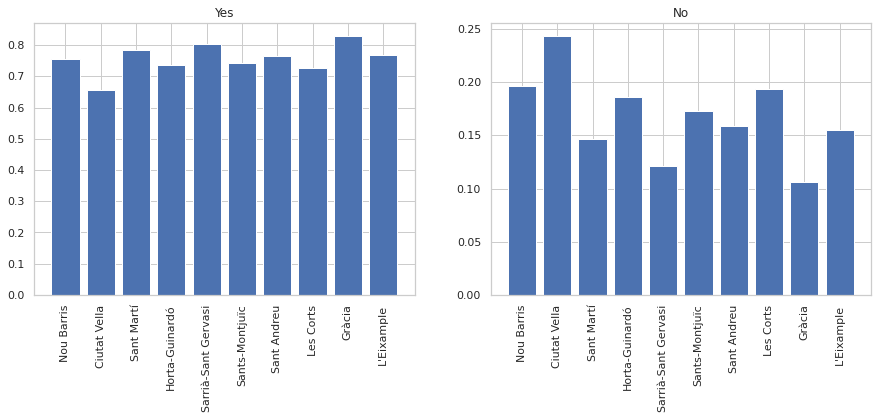

In [ ]:
# 18. In your home, or very close by, there is some outdoor place where you can play safely?
# ll_joc

plot_yes_no('ll_joc')

<AxesSubplot:>

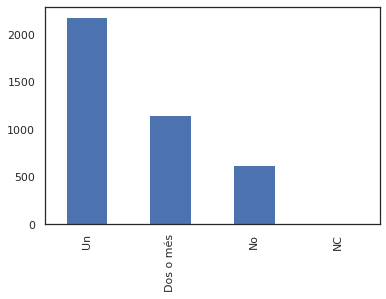

In [ ]:
# 19. Does your family have a car (or van)?
# cotxe

df['cotxe'].value_counts().plot(kind='bar')

<AxesSubplot:>

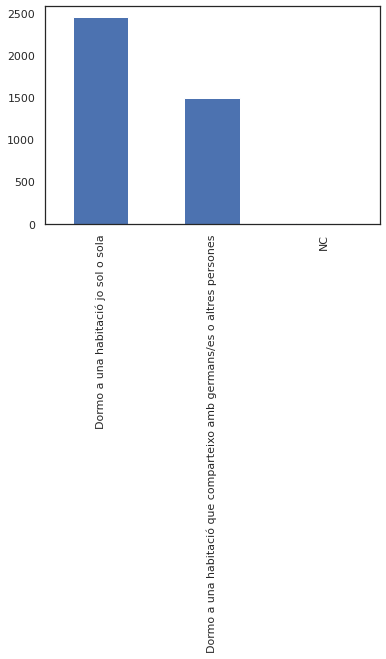

In [ ]:
# 20. Do you sleep in a room alone or alone, or do you share it?
# habitacio

df['habitacio'].value_counts().plot(kind='bar')

<AxesSubplot:>

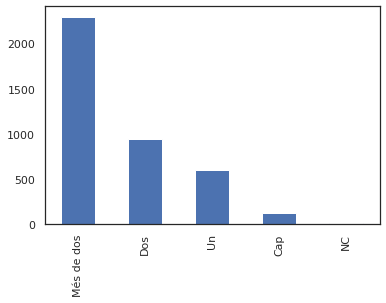

In [ ]:
# 21. How many computers does your family have?
# Includes desktops, laptops and / or tablets that work and someone uses.
# ordinadors
df['ordinadors'].value_counts().plot(kind='bar')

<AxesSubplot:>

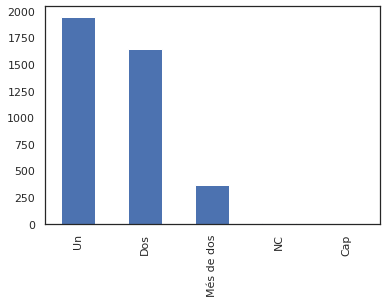

In [ ]:
# 22. How many bathrooms and / or toilets are there in your home?
# banys
df['banys'].value_counts().plot(kind='bar')

<AxesSubplot:>

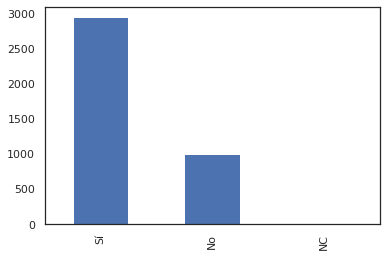

In [ ]:
# 23. Do you have a dishwasher in your home?
# rentaplats
df['rentaplats'].value_counts().plot(kind='bar')

<AxesSubplot:>

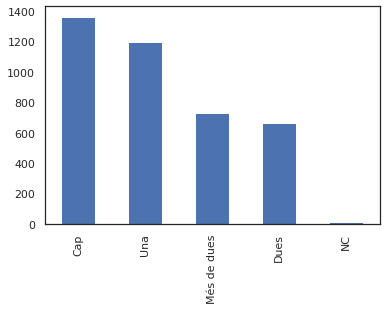

In [ ]:
# 24. Last year, how many times did you go on vacation with your family outside Spain?
# vacances
df['vacances'].value_counts().plot(kind='bar')

<AxesSubplot:>

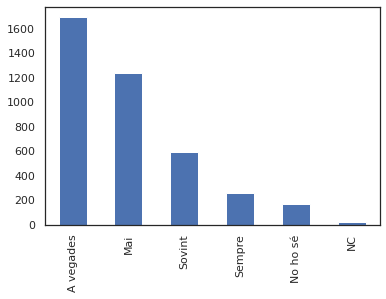

In [ ]:
# 25. How often do you worry about your family's money?
# preocupacio_diners
df['preocupacio_diners'].value_counts().plot(kind='bar')

<AxesSubplot:>

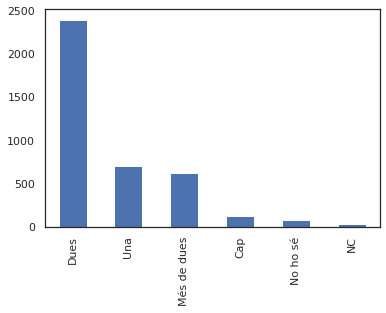

In [ ]:
# 26. How many people living with you have a job for which they get paid money?
# amb_qui_vius_feina
df['amb_qui_vius_feina'].value_counts().plot(kind='bar')

In [ ]:
def stacked_vars(df_t, name_var, colors, rename_var=''):
    count = df_t[name_var].value_counts(normalize=True)*100
    piv_ = count.to_frame().T
    levels = piv_.shape[1]

    if rename_var!='':
        piv_ = piv_.rename(index={name_var: rename_var})

    piv_.plot.barh(stacked=True, figsize=(10,3), color = colors[:levels])

    plt.legend(bbox_to_anchor=(0.98,0.9), loc="lower right", ncol=levels, frameon=False, fontsize='medium')
    plt.tick_params(labelsize=14, pad=6)
    
    ax = plt.gca()
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    # ax.spines["bottom"].set_visible(False)

    plt.tight_layout()

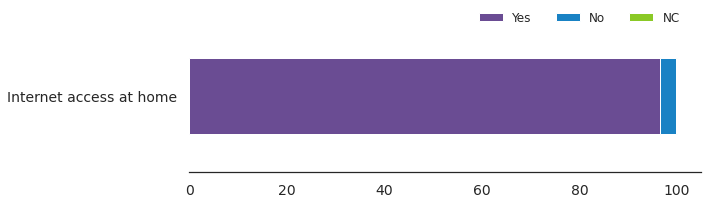

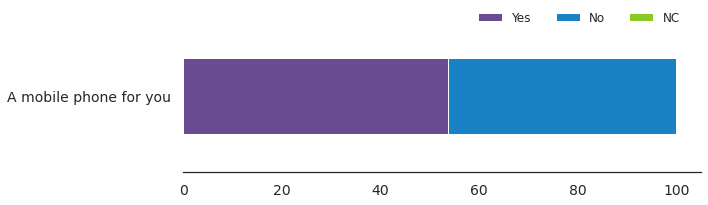

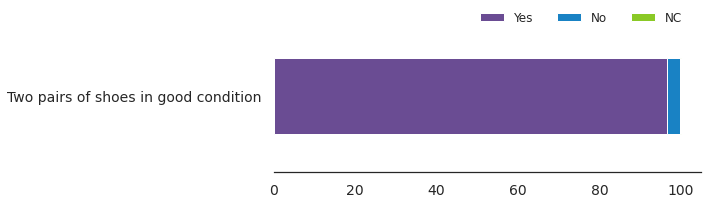

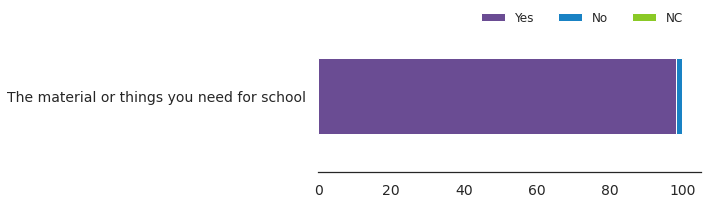

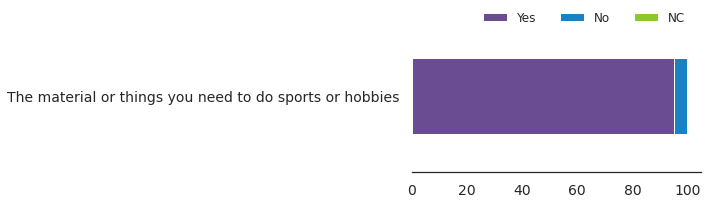

In [ ]:
colors_hex = ['#00378F', '#FF595E', '#FFCA3A', '#8AC926', '#1982C4', '#6A4C93']
import matplotlib.colors
colors = [matplotlib.colors.to_rgba(col) for col in colors_hex[::-1]]

exp_vars = ["bm_internet", "bm_mobil", "bm_sabates", "bm_mescola", "bm_maficions"] # column to plot
name_vars = ['Internet access at home', 'A mobile phone for you', 'Two pairs of shoes in good condition', 'The material or things you need for school', 'The material or things you need to do sports or hobbies'] # rename variable
for elem,lab in zip(exp_vars, name_vars):
    stacked_vars(df_t, elem, colors, lab)


## BLOCK 7: About the neighbourhood where you live | ANALYSIS


## Question 28 - Of the following, which ones do you have and which ones don’t?

#### Internet acces?

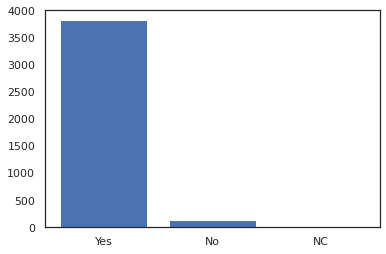

In [ ]:
xs = df_t['bm_internet'].unique()
ys = [(df_t['bm_internet'] == x).sum() for x in xs]

plt.bar(xs, ys)
# plt.boxplot(xs,ys)
plt.show()

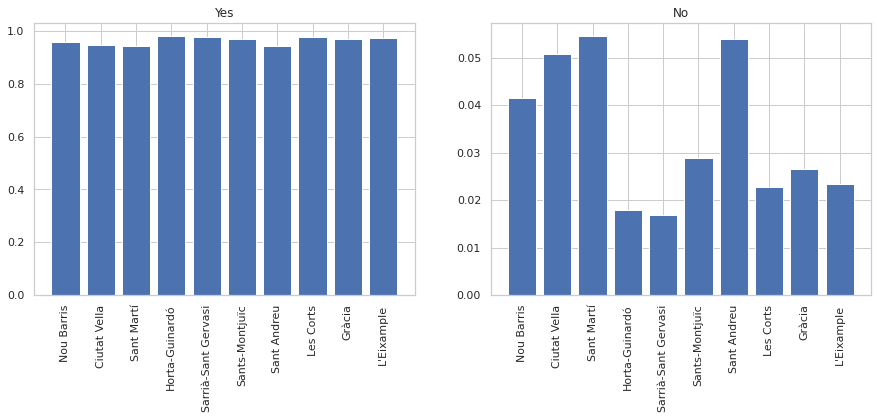

In [ ]:
# Do you have internet access at home?
plot_yes_no('bm_internet')

Funny to see that even though it was a relatively recent questionaire, there is still a small percentage of answers with a no.

#### A mobile phone?

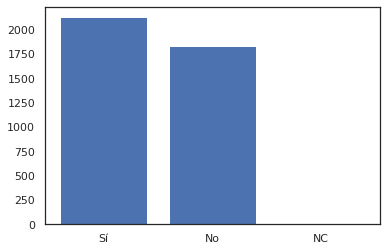

In [ ]:
xs = df['bm_mobil'].unique()
ys = [(df['bm_mobil'] == x).sum() for x in xs]

plt.bar(xs, ys)
plt.show()

Interesting, how is that distributed between the different districts?

We normalize the count, so that we see a percentage instead of a count. Otherwise it can be a misleading with the bar height.

### Do you have a mobile phone?

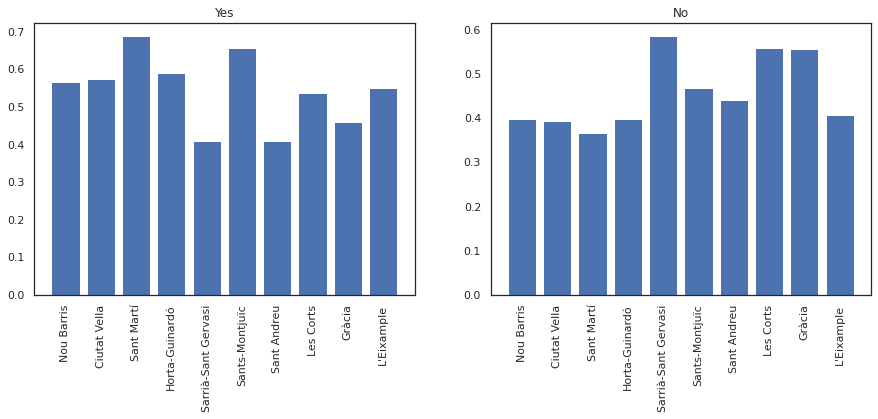

In [ ]:
plot_yes_no('bm_mobil')

### Do you have two pairs of shoes in good state?

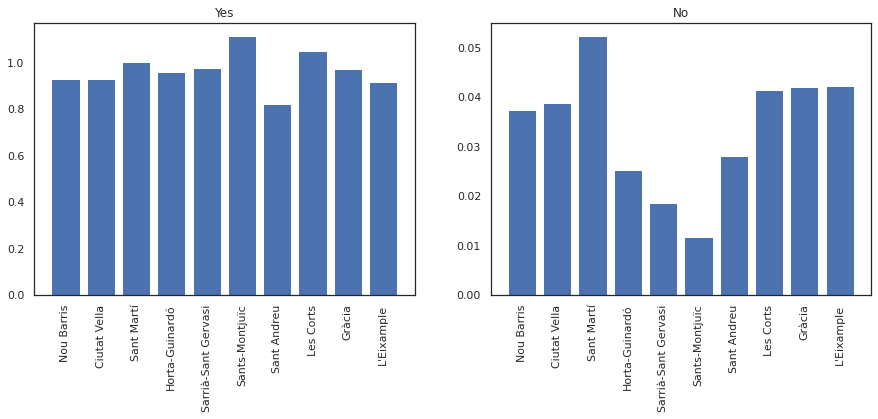

In [ ]:
plot_yes_no('bm_sabates')

### Do you have the material you need for school?

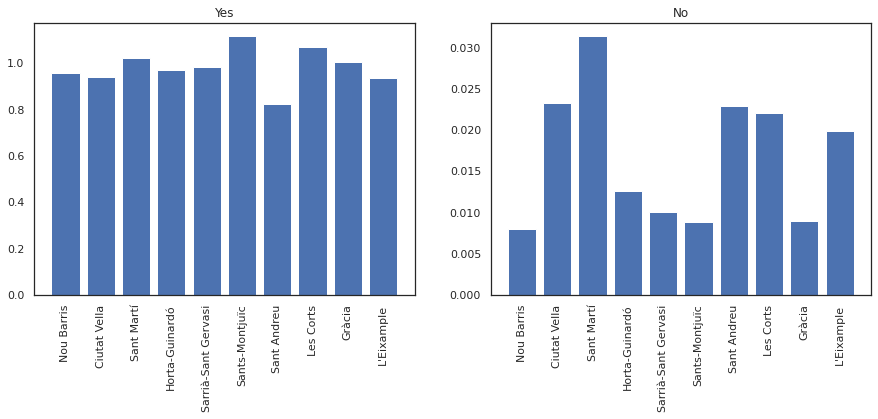

In [ ]:
plot_yes_no('bm_mescola') 

### Do you have the material you need to do sports or other hobbies?

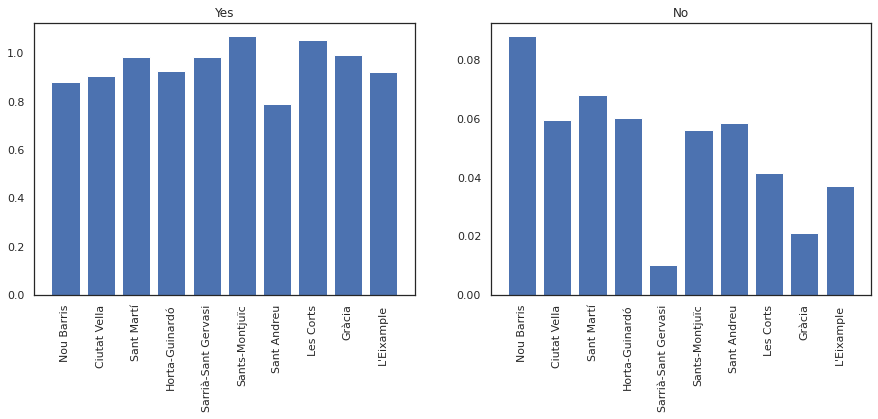

In [ ]:
plot_yes_no('bm_maficions') 

## Block 4: Question 17 and 25

### Question 17

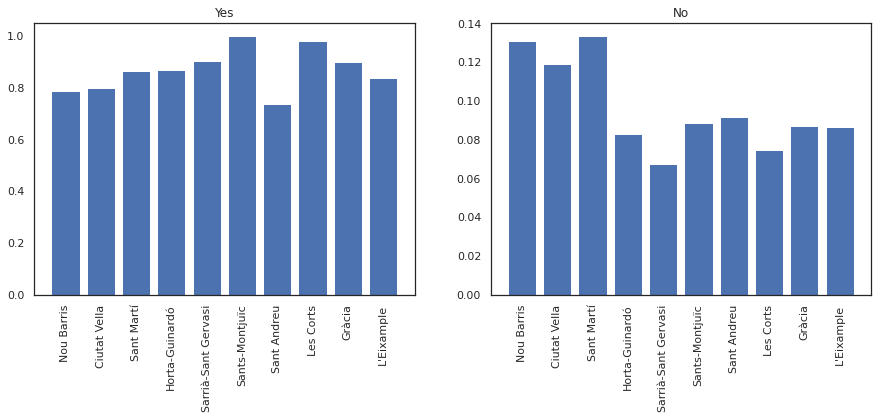

In [ ]:
# ll_estudi

plot_yes_no('ll_estudi')

## Feelings:

In [ ]:
def f_sbar_plot(dic): 
    # Plotting Feeling frequencies:
    plt.figure(figsize=(18, 10))
    # plt.rcParams['figure.dpi'] = 600
    axes = []

    # Aggregating each feeling level:
    cum_size = np.zeros(len(feelings))
    i=0
    for level, row_data in dic.items():
        axes.append(plt.barh(feelings_names, row_data, left=cum_size,
                                label=level, color=colors_rgba[i]))
        cum_size += row_data
        i +=1

    ax = plt.gca()
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_xticks(np.arange(0,101,20))
    plt.legend(bbox_to_anchor=(0.5,0.95), loc="lower center", ncol=len(levels), frameon=False, fontsize='medium',
    title = "                    Never                                                                                                                                                           All the time")
    # ax.legend(bbox_to_anchor=(0.5,0.95), loc="lower center", ncol=len(levels), frameon=False, fontsize='medium')

    # plt.ylabel("Feelings", fontsize=16)
    plt.xlabel("Ratio of answers per level", fontsize=16)
    plt.suptitle("How often did you have this feeling during the last two weeks?", fontsize=22)

    # plt.savefig('f_sbar.png', bbox_inches='tight')
    plt.show()

In [ ]:
# Feelings analysis 
cols = ['bm_mobil', 'f_felicitat', 'f_energia','f_calma', 'f_avorriment','f_estres','f_tristesa']
f_freq = df_t[cols].copy()
f_freq = f_freq.dropna()

feelings = cols[::-1][:-1]
levels = ['NC']+[str(n) for n in range(0,11)]

def f_dataprep_materials(f_freq, ret_dic=True, measure=None):
    # Creating a dataframe with the levels for bokeh
    df_ = pd.DataFrame(index=levels, columns=feelings)
    df_ = df_.fillna(np.nan)

    if measure is None:
        # Creating a dictionary with the levels to generate stacked bar
        dic = {}
        dic = {level:[] for level in levels}
        for feeling in feelings:
            ratio = f_freq[feeling].value_counts(normalize=True)*100
            for level in levels: 
                dic[level].append(ratio[level])
                df_[feeling] = ratio

    else:
        f_freq = f_freq[f_freq[measure] != 'NC']
        # Creating a dictionary with the levels to generate stacked bar
        dic = {}
        for option in f_freq[measure].unique():
            dic[option] = {level:[] for level in levels}

            option_df = f_freq[f_freq[measure] == option]
            for feeling in feelings:
                ratio = option_df[feeling].value_counts(normalize=True)*100
                for level in levels: 
                    try:
                        dic[option][level].append(ratio[level])
                        df_[feeling] = ratio
                    except:
                        dic[option][level].append(0.0)
                        df_[feeling] = 0.0

    if ret_dic:
        return(dic)
    else:
        return(df_)

In [ ]:
# Plot Labels
feelings_names = ["SAD", "STRESSED", "BORED","CALM", "ENERGETIC", "HAPPY"]
f_labels={}

for cat_e, eng_e in zip(feelings, feelings_names):
    f_labels[cat_e] = eng_e

# Defining incremental color scale
colors_hex = ['#EDF6CA',"#d9ed92","#b5e48c","#99d98c","#76c893","#52b69a","#34a0a4","#168aad","#1a759f","#1e6091","#184e77", "#0E2C44"]

import matplotlib.colors
colors_rgba = [matplotlib.colors.to_rgba(col) for col in colors_hex[::-1]]

In [ ]:
mobile_feelings = f_dataprep_materials(f_freq, True, 'bm_mobil')

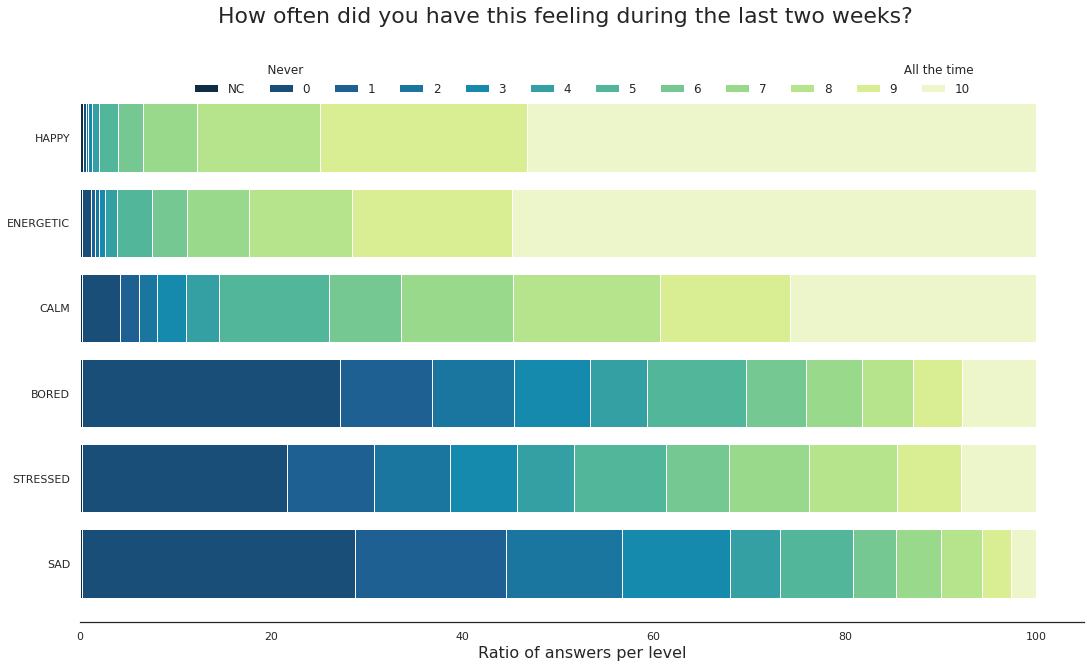

In [ ]:
f_sbar_plot(mobile_feelings['Yes'])

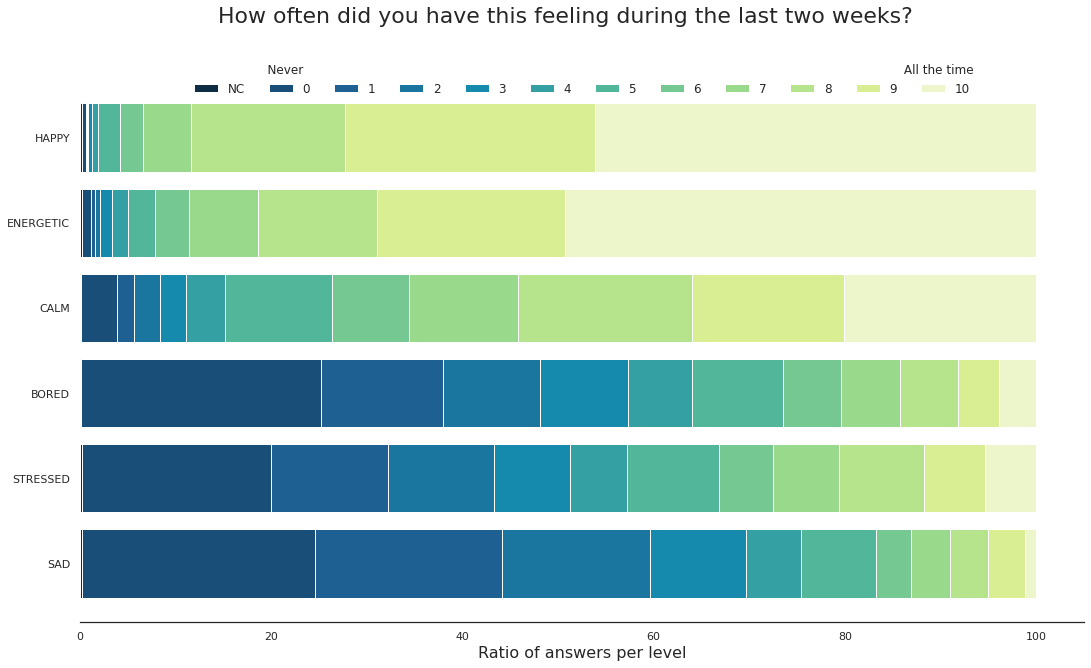

In [ ]:
f_sbar_plot(mobile_feelings['No'])

### Question 25

In [ ]:
# 'Nou Barris', 'Ciutat Vella', 'Sant Martí', 'Horta-Guinardó', 'Sarrià-Sant Gervasi', 'Sants-Montjuïc', 'Sant Andreu', 'Les Corts', 'Gràcia', "L'Eixample"

def plot_question25(question: str):

    choices = ['Never', 'Sometimes', 'Often', 'Always', 'I do not know', 'NC']  # Same order as in the question
    question_df = df_t[['Nom_Districte_Educatiu', question]]  # Only interested in district and question

    districts = question_df['Nom_Districte_Educatiu'].unique()
    district_count = question_df.groupby('Nom_Districte_Educatiu').count()[question]

    count_dict = pd.Series(district_count.values,index=district_count.index).to_dict()

    # set width of bars
    barWidth = 0.15

    bars = {}
    for c in choices:
        counts = []
        choice_filter = (question_df[question] == c)  # filter for choice

        for dis in districts:
            district_filter = (question_df['Nom_Districte_Educatiu'] == dis)  # filter for district
            val = question_df[district_filter & choice_filter].count().values[0]
            counts.append(val/count_dict[dis])
        
        bars[c] = counts
    
    # Set position of bar on X axis
    position = {}
    for i, c in enumerate(choices):
        if position.keys():
            idx = list(position.keys())[i-1]
            position[c] = [x + barWidth for x in position[idx]]
        else:
            position[c] = np.arange(len(bars[c]))   

    
    plt.figure(figsize=(10, 7))

    # Make the plot
    for c in choices:
        plt.bar(position[c], bars[c], width=barWidth, edgecolor='white', label=c)

    # Add xticks on the middle of the group bars
    idx = list(bars.keys())[0]
    plt.xticks([r + barWidth for r in range(len(bars[idx]))], districts, rotation=90)
    
    # Create legend & Show graphic
    plt.legend()
    plt.show()

{'Never': [0.30386740331491713, 0.34759358288770054, 0.3225806451612903, 0.2423469387755102, 0.38552188552188554, 0.306282722513089, 0.2702702702702703, 0.28463476070528965, 0.2861356932153392, 0.32642487046632124], 'Sometimes': [0.4613259668508287, 0.36363636363636365, 0.4317617866004963, 0.4107142857142857, 0.4074074074074074, 0.4162303664921466, 0.4624624624624625, 0.44080604534005036, 0.45427728613569324, 0.4378238341968912], 'Often': [0.13259668508287292, 0.1657754010695187, 0.12158808933002481, 0.21428571428571427, 0.11616161616161616, 0.13612565445026178, 0.13213213213213212, 0.16624685138539042, 0.18289085545722714, 0.13989637305699482], 'Always': [0.0718232044198895, 0.06951871657754011, 0.06947890818858561, 0.09693877551020408, 0.04208754208754209, 0.06806282722513089, 0.08408408408408409, 0.060453400503778336, 0.035398230088495575, 0.05699481865284974], 'I do not know': [0.03038674033149171, 0.0481283422459893, 0.05459057071960298, 0.030612244897959183, 0.04040404040404041, 

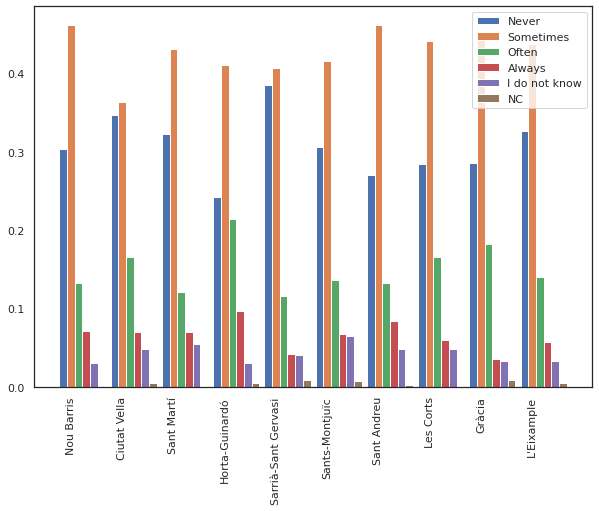

In [ ]:
# preocupacio_diners - Money concern
plot_question25('preocupacio_diners')

## ML Model: Clustering of neighbourhoods

So far several different attributes has been manually analyzed to see their impact of the life satisfaction of the questionaire participants. 
But we were curious to see if the data would have any underlying clustering, that wouldn't be possible for humans to see, but maybe a machine learning model would be able to catch.

To explore that option, a K-means clustering model were created. The data was split into two categories, using the `SLSSmc` column. Here, one category would represent participants who were _"very satisfied"_ and all other options would be categorized as _"other"_, in an effort to make the two clusters equal in size.

The data used in the model were a combination of all attributes investigated during the satisfaction analysis, including columns as `Sexe` (Sex), `Edat` (Age), `ERFDbllp` (Type of neighbourhood), etc. More data columns were also added in an effort to include as much information as possible in the analysis. Relevant columns were binarized or one-hot-encoded.

In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

def prepare_data(standardize=True):
    # Cluster DataFrame
    c_df = df_t.copy()
    c_df = c_df[c_df != 'NC'].dropna().reset_index(drop=True)

    c_cols = [
        'SLSSmc',  # The true classification
        'Sexe', 'Edat', # Sex and age
        'ERFDbllp', # neighbourhood
        'dificultat_aprenentatge',  # Learning difficulities
        'dificultat_per_malaltia', # Difficulties due to illness
        'preocupacio_diners', # Freq. Money Concerns
        'b_seguretat', # Do yo feel secure in your neighborhood?
        'f_felicitat', 'f_tristesa', 'f_calma', 'f_estres', 'f_energia', 'f_avorriment',  # Feelings
        'bm_internet', 'bm_mobil', 'bm_sabates', 'bm_mescola','bm_maficions',  # Access to material
        ]

    c_df = c_df[c_cols]

    c_df['Edat'] = c_df[c_df['Edat'].isin(['10', '11', '12'])]['Edat']
    c_df['ERFDbllp'] = c_df[c_df['ERFDbllp'].isin(['Low-income neighborhoods', 'Intermediate income neighborhoods', 'High-income neighborhoods'])]['ERFDbllp']
    
    ## There is going to be two groups: Very satisfied and other (better name pending)
    groups = {}
    for i, cat in enumerate(c_df['SLSSmc'].value_counts().index):
        if i == 0:
            groups[cat] = 'Very satisfied'
        else:
            groups[cat] = 'Other'

    c_df['SLSSmc'] = c_df['SLSSmc'].map(groups)

    binary_d = defaultdict(LabelEncoder)
    
    one_hot_col = ['Edat', 'ERFDbllp', 'dificultat_aprenentatge', 'dificultat_per_malaltia', 'preocupacio_diners', 'b_seguretat']
    binary_col = ['SLSSmc', 'Sexe', 'bm_internet', 'bm_mobil', 'bm_sabates', 'bm_mescola','bm_maficions']
    num_cols = ['f_felicitat', 'f_tristesa', 'f_calma', 'f_estres', 'f_energia', 'f_avorriment']

    c_df[num_cols] = c_df[num_cols].astype('float')  # Make sure all numbers are floats and not objects

    for col in one_hot_col:
        one_hot = pd.get_dummies(c_df[col])  # Get one hot encoding of columns B
        one_hot.columns = [f'{col}_{oh_col}' for oh_col in one_hot.columns]  # 
        c_df = c_df.drop(col, axis=1)  # Drop column as it is now encoded
        c_df = c_df.join(one_hot)  # Join the encoded df

    # Encoding the variable
    binary_fit = c_df[binary_col].apply(lambda x: binary_d[x.name].fit_transform(x)).reset_index(drop=True)
    c_df[binary_col] = binary_fit

    if standardize:
        c_df[num_cols] = pd.DataFrame(StandardScaler().fit_transform(c_df[num_cols]), columns=num_cols).reset_index(drop=True)
    else:
        c_df[num_cols] = c_df[num_cols].reset_index(drop=True)

    return c_df, binary_d

In [5]:
trans_df, _ = prepare_data(False)

X = trans_df.iloc[:, 1:].values
y = trans_df.iloc[:, 0].values  # SlSSmc

In [6]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

In [7]:
from scipy.stats import mode

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(2):
    mask = (clusters == i)
    labels[mask] = mode(y[mask])[0]

# Compute the accuracy
accuracy_score(y, labels)

0.6972010178117048

It's seen that the model accurately clusters the data with an accuracy of $\sim 69.7\%$. Looking at this number alone, makes it look like some kind of clustering is apperent, but it is misleading. The two categories created, has the following number of observations:

$$
\text{Very satisfied} = 2466,\ \text{other} = 1071.
$$

With a quick calculation you get the follwing result:

$$ 
\frac{2466}{2466+1071} = 0.6972010178117048 
$$

So the accuracy achieved could in reality be the result of clustering all data points as a single cluster or, if two clusters are present, both clusters consists of a majority of the _"very satisfied"_ category.
To see if this can be visualized, a PCA is performed on the data.

The explained variance of the principal components, are: [0.38610819 0.16089171]


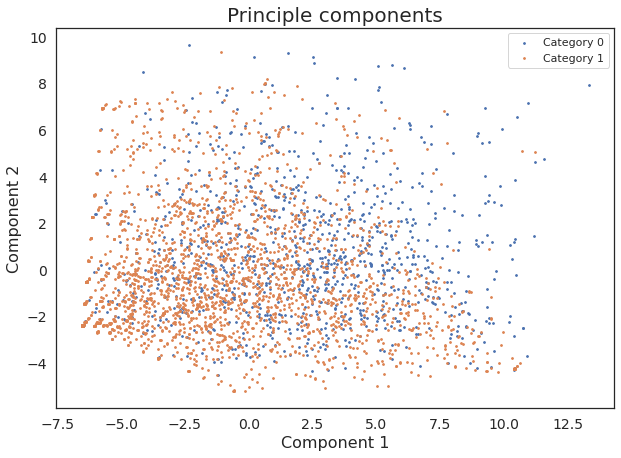

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
pc_variance = pca.explained_variance_ratio_
print('The explained variance of the principal components, are:', pc_variance)

X_pca = pca.transform(X)

plt.figure(figsize=(10, 7))
for t in np.unique(y):
    mask = (y == t)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=f'Category {t}', s=3)

plt.title('Principle components', size=20)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('Component 1', size=16)
plt.ylabel('Component 2', size=16)
plt.legend()
plt.show()

Plotting the data using principle component 1 and 2 we see that no clustering or correlation is visible. The two categories are mixed between each other and while there is some concentration of points in the bottom left corner of the plot, most points are scattered following no pattern. 

The lack of clustering and the bad seperation in the PC space might be a result of the data format. Most columns of the data is binary, while the remaining columns consist of discrete values. This might lead to a lack of correlation between columns. 

# Not needed from here

In [ ]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
X_proj = tsne.fit_transform(X)

# Compute the clusters
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(X)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(2):
    mask = (clusters == i)
    labels[mask] = mode(y[mask])[0]

# Compute the accuracy
accuracy_score(y, labels)

0.6972010178117048

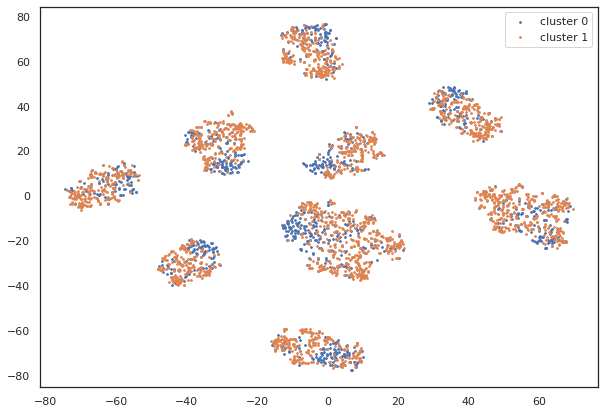

In [ ]:
plt.figure(figsize=(10, 7))
for t in np.unique(y):
    mask = (y == t)
    plt.scatter(X_proj[mask, 0], X_proj[mask, 1], label=f'cluster {t}', s=3)

plt.legend()
plt.show()

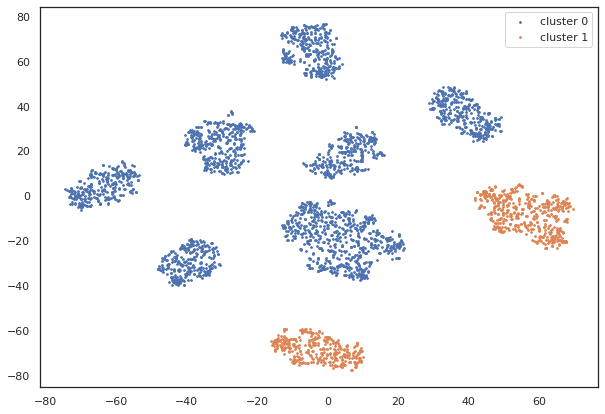

In [ ]:
plt.figure(figsize=(10, 7))
for t in np.unique(clusters):
    mask = (clusters == t)
    plt.scatter(X_proj[mask, 0], X_proj[mask, 1], label=f'cluster {t}', s=3)

plt.legend()
plt.show()

## ML Model: Random Forest Classifier

In [ ]:
trans_df, _ = prepare_data(False)

X = trans_df.iloc[:, 1:].values
y = trans_df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.785958904109589

In [ ]:
y_pred = clf.predict(X_train)
accuracy_score(y_train, y_pred)

1.0

## K-nearest neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = neigh.predict(X_test)
accuracy_score(y_test, y_pred)

0.7696917808219178

In [ ]:
y_pred = neigh.predict(X_train)
accuracy_score(y_train, y_pred)

0.8049810046433095

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5cb1a2c0-2f56-40d6-8008-fedeaf8b6a17' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>